## Load up the environment variable needed for module imports

In [68]:
%env MIRA_REST_URL=http://34.230.33.149:8771

env: MIRA_REST_URL=http://34.230.33.149:8771


## Import modules

In [69]:
from mira.sources import biomodels
from mira.metamodel.comparison import *
from mira.metamodel.template_model import *
from mira.metamodel.templates import *
from mira.sources import biomodels

from itertools import combinations
from copy import deepcopy
from tabulate import tabulate

import pandas as pd 

## Define the Covid epi models to be compared and add them to a list 

In [70]:
COVID_MODEL_LIST = ["BIOMD0000000955", "BIOMD0000000956", "BIOMD0000000957","BIOMD0000000958","BIOMD0000000960","BIOMD0000000962"]
rc = get_dkg_refinement_closure()

tm_covid_grounding_list = []
for covid_model in COVID_MODEL_LIST:
    tm_covid_grounding_list.append(biomodels.get_template_model(covid_model))

## Compute pairwise similarity scores between each grounded model

In [71]:
tm_covid_comparison = TemplateModelComparison(tm_covid_grounding_list,refinement_func=rc.is_ontological_child)
grounded_scores = tm_covid_comparison.model_comparison.get_similarity_scores()

grounded_scores_df_list = [{'Model1':d['models'][0], 'Model2':d['models'][1], 'Similarity Score':d['score']} for d in grounded_scores]
df_grounded = pd.DataFrame(grounded_scores_df_list)
df_grounded

Comparing model templates: 946it [00:00, 164550.72it/s]
Comparing model concepts: 595it [00:00, 234858.92it/s]


,Model1,Model2,Similarity Score
0,Giordano2020,Bertozzi2020,0.6250
1,Giordano2020,Roda2020,0.7500
2,Giordano2020,Ndairou2020,0.4375
3,Giordano2020,Paiva2020,0.4375
4,Giordano2020,Zhao2020,0.4375
5,Bertozzi2020,Roda2020,0.8750
6,Bertozzi2020,Ndairou2020,0.5000
7,Bertozzi2020,Paiva2020,0.4375
8,Bertozzi2020,Zhao2020,0.6250
9,Roda2020,Ndairou2020,0.5000


## Print the annotations for the selected grounded covid biomodels to know which ones we are comparing

We select the third (BIOMD0000000957) and sixth (BIOMD0000000962) grounded covid models 

In [72]:
print(tm_covid_comparison.template_models[2].annotations)
print()
print(tm_covid_comparison.template_models[5].annotations)

name='Roda2020 - SIR model of COVID-19 spread in Wuhan' description=None license='CC0' authors=[] references=['pubmed:32289100'] time_scale=None time_start=None time_end=None locations=[] pathogens=['ncbitaxon:2697049'] diseases=[] hosts=['ncbitaxon:9606'] model_types=['mamo:0000028']

name='Zhao2020 - SUQC model of COVID-19 transmission dynamics in Wuhan, Hubei, and China' description=None license='CC0' authors=[] references=['pubmed:32219006'] time_scale=None time_start=None time_end=None locations=[] pathogens=['ncbitaxon:2697049'] diseases=[] hosts=['ncbitaxon:9606'] model_types=['mamo:0000028']


## Create an image comparing the selected grounded models

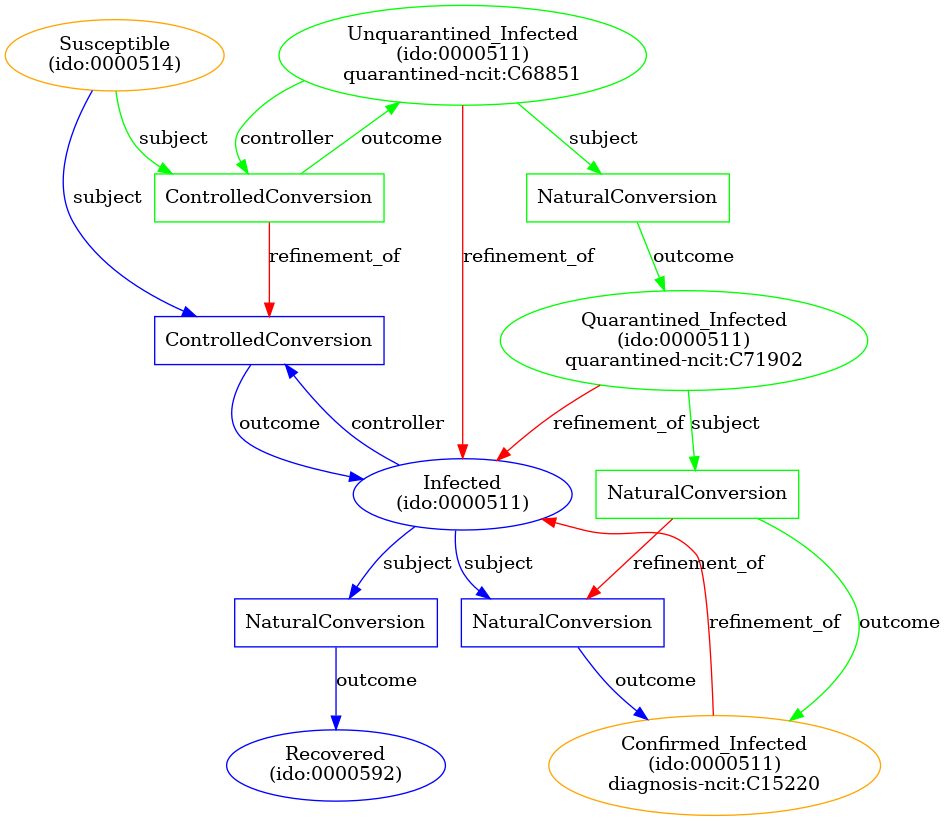

In [73]:
TemplateModelDelta.for_jupyter(tm_covid_comparison.template_models[2],tm_covid_comparison.template_models[5],
                                               rc.is_ontological_child, args="-Grankdir=TB")

## Create a list of covid biomodels without grounding 

In [74]:
tm_covid_no_grounding_list = [] 
for tm in tm_covid_grounding_list:
    copied_tm = deepcopy(tm)
    for template in copied_tm.templates:
        for concept in template.get_concepts():
            concept.identifiers = {}
            concept.context = {}
    tm_covid_no_grounding_list.append(copied_tm)

## Compute pairwise similarity scores between each ungrounded model

We compare grounded and ungrounded model similarity scores side-by-side

In [78]:
tm_covid_comparison_copy = TemplateModelComparison(tm_covid_no_grounding_list,refinement_func=rc.is_ontological_child)
ungrounded_scores = tm_covid_comparison_copy.model_comparison.get_similarity_scores()

list_of_both = []

for grounded_score,ungrounded_score in zip(grounded_scores,ungrounded_scores):
    list_of_both.append({'Model1':grounded_score['models'][0],'Model2':grounded_score['models'][1],
                         'sim_dkg':grounded_score['score'],'sim_no_dkg':ungrounded_score['score']})
                    

no_ground_df = pd.DataFrame(list_of_both)
no_ground_df

Comparing model templates: 946it [00:00, 176897.53it/s]
Comparing model concepts: 595it [00:00, 286950.77it/s]


,Model1,Model2,sim_dkg,sim_no_dkg
0,Giordano2020,Bertozzi2020,0.6250,0.250
1,Giordano2020,Roda2020,0.7500,0.250
2,Giordano2020,Ndairou2020,0.4375,0.125
3,Giordano2020,Paiva2020,0.4375,0.125
4,Giordano2020,Zhao2020,0.4375,0.125
5,Bertozzi2020,Roda2020,0.8750,0.750
6,Bertozzi2020,Ndairou2020,0.5000,0.250
7,Bertozzi2020,Paiva2020,0.4375,0.250
8,Bertozzi2020,Zhao2020,0.6250,0.250
9,Roda2020,Ndairou2020,0.5000,0.250


## Create an image comparing selected ungrounded models

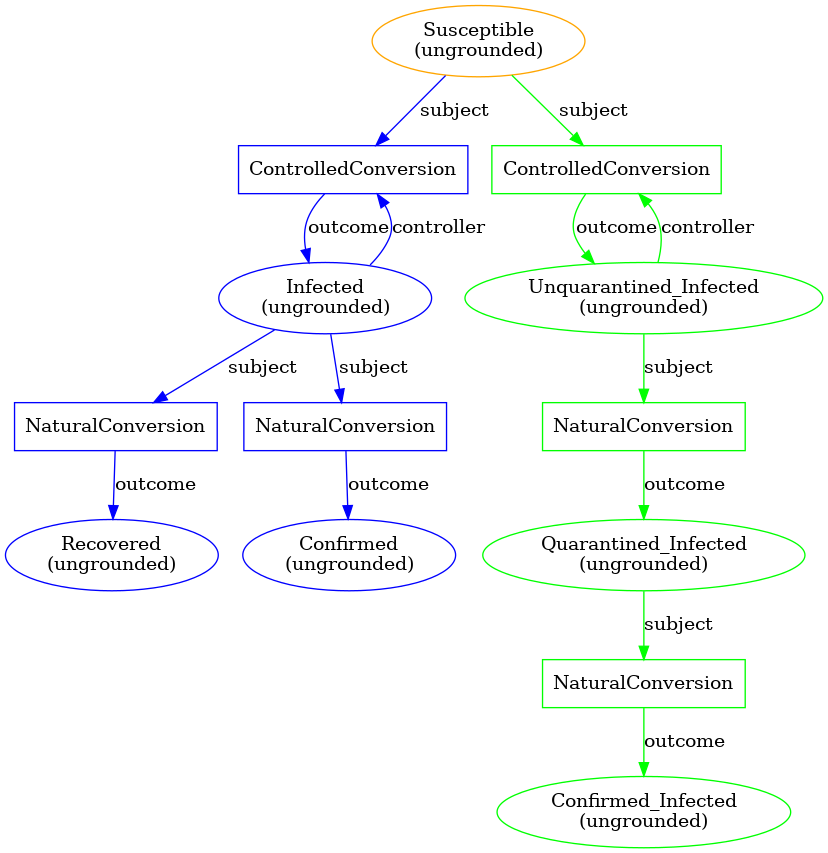

In [76]:
TemplateModelDelta.for_jupyter(tm_covid_comparison_copy.template_models[2],tm_covid_comparison_copy.template_models[5],
                                               rc.is_ontological_child,args="-Grankdir=TB")

## Reasoning on difference between grounded and ungrounded models

The similarity score for models 2 and 5 when grounded is 0.625. The similarity score for the models when ungrounded is 0.25. The reasoning for this is because the refinements dissapear and the confirmed concept node is no longer the same between the two models.

Out of 15 pairs of selected Covid-19 Biomodels, 13 pairs have different similarity scores when using the Domain Knowledge Graph